## Final Assignment 

#### Part 1 and 2
1. The first part of AccessViz finds the from the data/TravelTimes folder the traveltimes-text files the user specifies with by YKR_ID in the YKR_ID_list in the start of the code.

2. After finding the specified traveltimes-txt files, this code reads the files and stores them into a folder data/shapefiles. The shapefiles are named the YKR_ID of the file. (eg. 5878087.shp)


In [1]:
import geopandas as gpd
import pandas as pd
import os

#read and take a look at the YKR_grid shp file 
grid_fp = 'data/MetropAccess_YKR_grid/MetropAccess_YKR_grid_EurefFIN.shp'

#read the file
grid = gpd.read_file(grid_fp)

# Change the name of YKR_ID to from_id, to enable the join
grid.rename(columns={'YKR_ID': 'from_id'}, inplace=True)

# See the column names and confirm that we now have a column called 'from_id'
grid.head()
#grid.crs

,x,y,from_id,geometry
0,381875.0,6697880.0,5785640,"POLYGON ((382000.0001388059 6697750.000128186,..."
1,382125.0,6697880.0,5785641,"POLYGON ((382250.00013875 6697750.000128181, 3..."
2,382375.0,6697880.0,5785642,"POLYGON ((382500.0001386951 6697750.000128172,..."
3,382625.0,6697880.0,5785643,"POLYGON ((382750.0001386406 6697750.000128165,..."
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000138978 6697500.000128254, ..."


1. This first part of the code finds all the textfiles in the data/TravelTime folder, and then store each of the traveltime modes into a shapefile named the YKR_ID number of the file. <br />

2. The user has to specify which YKR_IDs she/he wants to use in YKR_ID, where it says "specify YKR_IDs here!"<br />

3. The rest of the code reads in the .txt-files to pandad dataframe, converst it into a geopandas dataframe and stores each of the geodataframes into shapefiles called the YKR_ID number of the text file. 

4. I tried to write the code in a way that would say if the YKR_ID did not exist in the data/TravelTime-folder. My code would not work when I tried that, so i decided to leave it out, in order to make the code work. At the bottom of this markadown cell is the code I used for trying. I am pretty sure that the error is in how I coded the 'if'-statement, and I tried different ways, but non of the worked.

5. I also did not manage to write my code in a way that would inform the user about how the progression in the reading of files is going.

```
for YKR_ID in YKR_IDs: 
    #create path where the file is found
    path = ('data/TravelTimes/travel_times_to_')
    #create empty list where the filepath coresponding to YKR_ID-list can be stored.
    fp_list = []
    #create filepaths
    filepath = os.path.join(path + YKR_ID + '.txt')
    #append filepaths to the fp_list.
    fp_list.append(filepath)
    #print(fp_list)
    ```
```        
    #iterate over the filepaths stored in the fp_list
    for idx, fp in enumerate(fp_list):
        print(fp) 
    ```

```
'''if filepath does not exist in folder, print that the the filepath does not exist in the folder'''
        if fp is not in filepaths:
             print('This YKR_ID does not exist in folder')
             ```
```                
'''if the filepath exists in the filepaths list over files in the folder, create this into a dataframe'''
        else:
        data_ = pd.read_csv(fp, sep=';', usecols = ['from_id', 'pt_r_t'])
        print(data_.head())
```

In [2]:
#specify YKR_IDs here!
YKR_ID_list = ['5975373', '5878087']

In [3]:
import glob
import os
import geopandas as gpd
import pandas as pd

#find all txt files in data/TravelTimes folder
all_filepaths = glob.glob('data/TravelTimes/*.txt')
#print(filepaths)

#list of YKR_IDs I want to import: 
YKR_IDs = YKR_ID_list

#Find filepaths for files specified in YKR_IDs 
for YKR_ID in YKR_IDs: 
    #create path where the file is found
    path = ('data/TravelTimes/travel_times_to_')
    #create empty list where the filepath coresponding to YKR_ID-list can be stored.
    fp_list = []
    #create filepaths
    filepath = os.path.join(path + YKR_ID + '.txt')
    #append filepaths to the fp_list.
    fp_list.append(filepath)
    #print(fp_list)

In [ ]:
    #iterate over the filepaths stored in the fp_list
    for idx, fp in enumerate(fp_list):
        #print(fp)
        
        #read the data to dataframe
        data_ = pd.read_csv(fp, sep=';')
        #print(data_.head())
        
        #merge data_ (pd) and grid(gpd) together on 'from_id'  
        data = grid.merge(data_, on='from_id')
        #data.head()
   
        #set CRS
        CRS = grid.crs

        #make in into a geodataframe
        travel_times = gpd.GeoDataFrame(data, crs=CRS, geometry ='geometry')
        
        #check the output
        print(travel_times.head())  
        
        #save the geodataframes into shapefiles called the YKR_ID.shp in the folder shapefiles in data folder.
        for travel_time in travel_times.iterrows():
            #print(travel_time)
            # Create a output path for the data
            out_p = ('data/shapefiles/') 
            out_fp = os.path.join(out_p + YKR_ID + '.shp')
            travel_times.to_file(out_fp)

#### PART 3: 
visualize the travel times of selected YKR_IDs based on the travel mode that the user specifies. It can save those maps into a folder that user specifies. The output maps can be either static or interactive and user can choose which one with a parameter. You can freely design yourself the style of the map, colors, travel time intervals (classes) etc. Try to make the map as informative as possible!


The user also has to specify which TravelTime column she/he wants to use, where it says "specify traveltime mode here". Or else the 'pt_r_t'(public transport, rushour, time) will be used by default. <br />

['data/shapefiles/5975373.shp', 'data/shapefiles/5878087.shp']


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


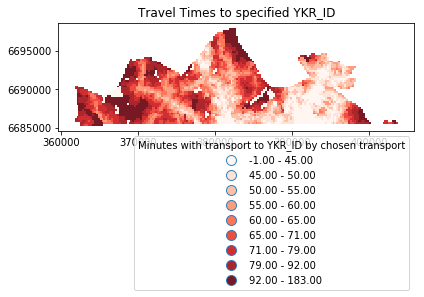

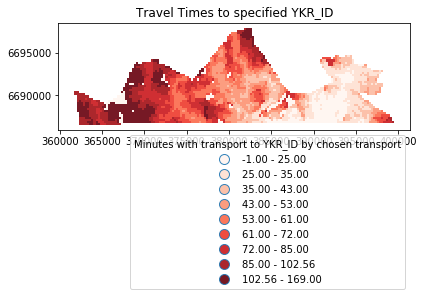

In [12]:
import glob
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
%matplotlib inline

shp_files = glob.glob('data/shapefiles/*.shp')
print(shp_files)

#SPECIFY COLUMN YOU WOULD LIKE TO SPECIFY HERE
column_for_visualising = "pt_r_t"

for idx, fp in enumerate(shp_files):
    #print(fp)
    shp_data = gpd.read_file(fp)
    #print(shp_data.head())
    
    #create map using matplotlib.plt
    my_map = shp_data.plot(column=column_for_visualising, linewidth=0.03, cmap="Reds", scheme="quantiles", k=9, alpha=0.9, legend=True)
    
    #get legend and place it at the map
    my_map.get_legend().set_title("Minutes with transport to YKR_ID by chosen transport")
    my_map.get_legend().set_bbox_to_anchor((1.0, 0.0))
    
    #set title
    my_map.set_title('Travel Times to specified YKR_ID')

    #remove empty white-space around the axes
    plt.tight_layout()

    #add basemap
    #ctx.add_basemap(my_map, url = ctx.tile_providers.OSM_A)
    
    # Save the figure as png file with resolution of 300 dpi
    out_p_m = ('data/static_maps/')     
    out_fp_m = os.path.join(out_p_m + YKR_ID + '.png')
    plt.savefig(out_fp_m)
